In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday/train.csv
/kaggle/input/black-friday/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

%matplotlib inline


In [3]:
df_train=pd.read_csv('/kaggle/input/black-friday/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
##  import the test data
df_test=pd.read_csv('/kaggle/input/black-friday/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
df_train.shape

(550068, 12)

In [6]:
# #concat the dataset
# df = df_train.append(df_test)
# df.head()

## Training Data EDA

In [7]:
#checking the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
#checking null values in training dataset
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

_We have missing values in the Product_Category_2 & Product_Category_3, need to a way to treat them_

In [10]:
#checking percentage of nulls
round((df_train.isnull().sum()/len(df_train.index))*100,2)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            31.57
Product_Category_3            69.67
Purchase                       0.00
dtype: float64

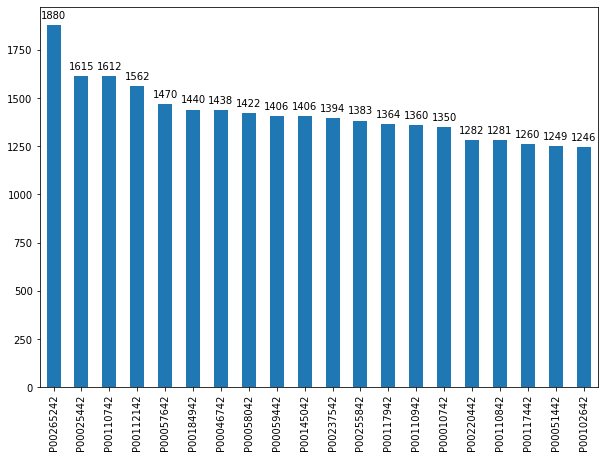

In [11]:
ax = df_train['Product_ID'].value_counts().head(20).plot(kind='bar', figsize=(10,7))

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
           y = height+50,
           s=height,
           ha='center',
            va='center'
          )

The column has total of 550068 items, plotting the top 20

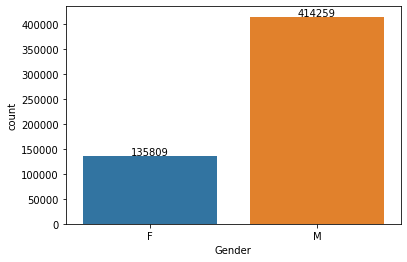

In [12]:
ax = sns.countplot(x='Gender', data=df_train)

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
            y = height+500,
            s=height,
            ha='center'
           )

plt.show()

The data has 2 values for gender column, maximum are males

In [13]:
df_train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

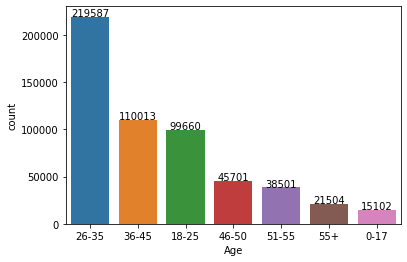

In [14]:
ax = sns.countplot(x='Age', data=df_train, order=['26-35',
'36-45',
'18-25',
'46-50',
'51-55',
'55+',
'0-17'])# use order to define the order in whih we want to see the analysis.

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
            y = height+500,
            s=height,
            ha='center'
           )

plt.show()

The **Age** column is divided into ranges of ages & the maximum age group that makes the purchase are in the age group of **26-35**

In [15]:
df_train['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

The **Occupation** is encoded into numbers, plotting the count of occupations

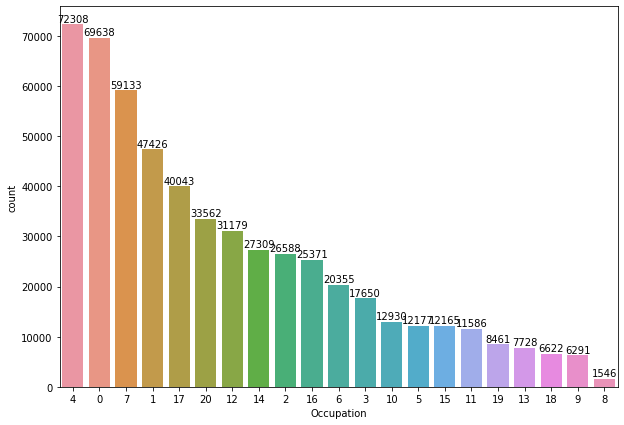

In [16]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='Occupation', data=df_train, order=df_train['Occupation'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
            y = height+500,
            s=height,
            ha='center'
           )


plt.show()

In [17]:
df_train['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

The **City_Category** column is also encoded, so plotting to see the dta distribution

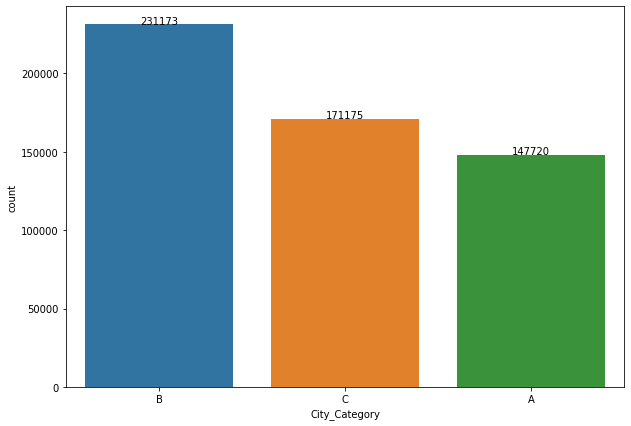

In [18]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='City_Category', data=df_train, order=df_train['City_Category'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
            y = height+500,
            s=height,
            ha='center'
           )


plt.show()

In [19]:
df_train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

The data has stay in city upto 4 years, the data distribution is as follows

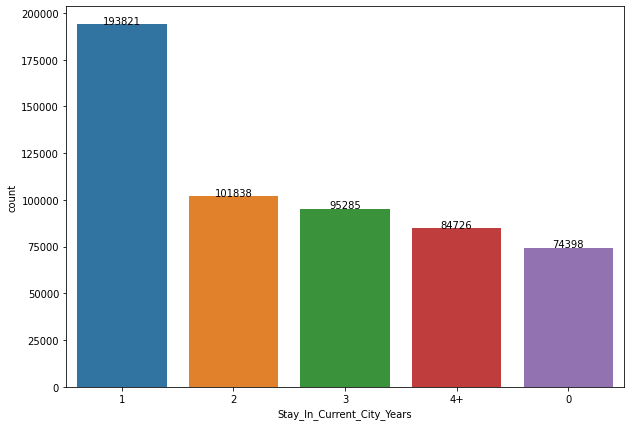

In [20]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='Stay_In_Current_City_Years', data=df_train, order=df_train['Stay_In_Current_City_Years'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
            y=height+100,
            s=height,
            ha='center'
           )
plt.show()

In [21]:
df_train['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

Marital Status is encoded as **0** & **1**, plotting the same

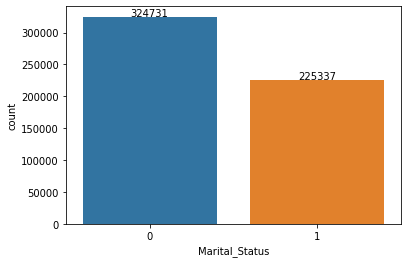

In [22]:
ax = sns.countplot(x='Marital_Status', data=df_train)

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+ (p.get_width()/2),
            y=height+1000,
            s=height,
            ha='center'
           )
plt.show()

In [23]:
df_train['Product_Category_1'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

**Product_Category_1** is encoded, plotting the distribution

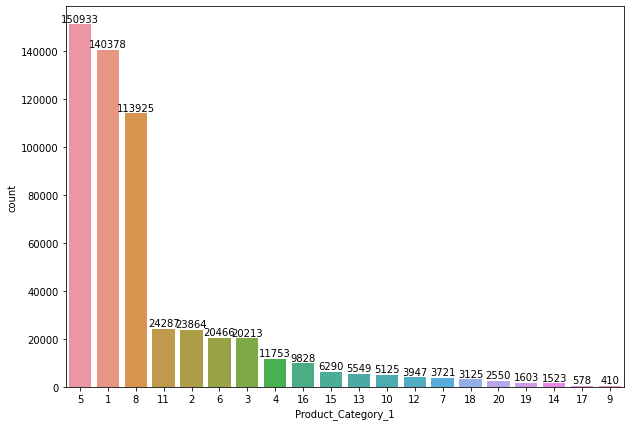

In [24]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='Product_Category_1', data=df_train, order=df_train['Product_Category_1'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
            y=height+1000,
            s=height,
            ha='center',
            va='baseline'
           )
plt.show()

In [25]:
df_train['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

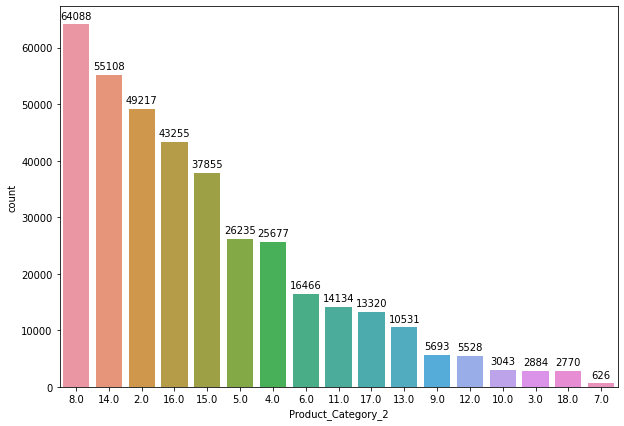

In [26]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='Product_Category_2', data=df_train, order=df_train['Product_Category_2'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
            y=height+1000,
            s=height,
            ha='center',
            va='baseline'
           )
plt.show()

In [27]:
df_train['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

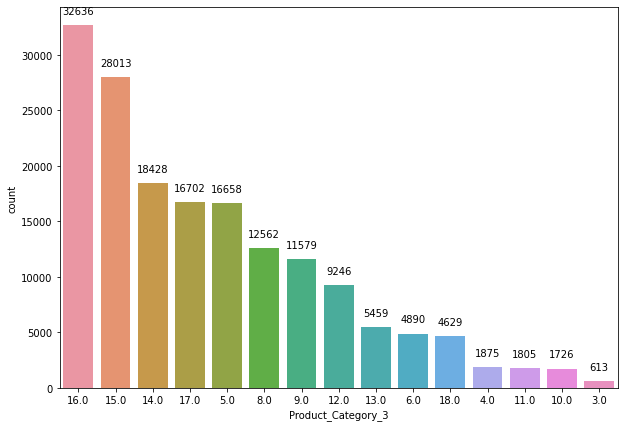

In [28]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='Product_Category_3', data=df_train, order=df_train['Product_Category_3'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+(p.get_width()/2),
            y=height+1000,
            s=height,
            ha='center',
            va='baseline'
           )
plt.show()

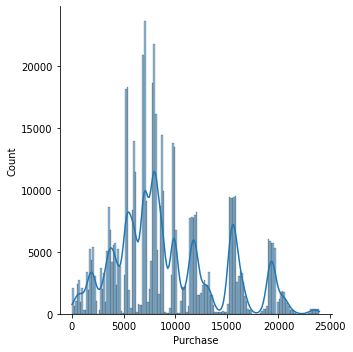

In [29]:
sns.displot(df_train['Purchase'], kde=True, kind='hist')
plt.show()

Lets drop the Null values in product category

In [30]:
print('Shape of df_train before dropping nulls:', df_train.shape)

Shape of df_train before dropping nulls: (550068, 12)


In [31]:
#df_train.dropna(inplace=True, axis=0)
#dropping the Product_Category_3 columns has it has 67% nulls
df_train.drop(['Product_Category_3'], axis=1, inplace=True)

In [32]:
#dropping null rows from Product_Category_2
df_train.dropna(axis=0, inplace=True)

In [33]:
print('Shape of df_train after dropping nulls:', df_train.shape)

Shape of df_train after dropping nulls: (376430, 11)


So, after dropping we have around 68% data for model training

In [34]:
#checking the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376430 entries, 1 to 545914
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     376430 non-null  int64  
 1   Product_ID                  376430 non-null  object 
 2   Gender                      376430 non-null  object 
 3   Age                         376430 non-null  object 
 4   Occupation                  376430 non-null  int64  
 5   City_Category               376430 non-null  object 
 6   Stay_In_Current_City_Years  376430 non-null  object 
 7   Marital_Status              376430 non-null  int64  
 8   Product_Category_1          376430 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Purchase                    376430 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 34.5+ MB


In [35]:
df_train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

## Test Data EDA

In [36]:
#checking the shape of test data
df_test.shape

(233599, 11)

In [37]:
#checking Nulls
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

**Product_Category_2** & **Product_Category_3** has missing values, applying the same logic as done above:

- Drop Product_Category_3
- Drop the null values from Product_Category_3

In [38]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [39]:
#dropping Product_Category_3
df_test.drop('Product_Category_3',axis=1, inplace=True)
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0


In [40]:
df_test.dropna(axis=0, inplace=True)
df_test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

Now the dataset is Nulls free, lets perform EDA

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161255 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     161255 non-null  int64  
 1   Product_ID                  161255 non-null  object 
 2   Gender                      161255 non-null  object 
 3   Age                         161255 non-null  object 
 4   Occupation                  161255 non-null  int64  
 5   City_Category               161255 non-null  object 
 6   Stay_In_Current_City_Years  161255 non-null  object 
 7   Marital_Status              161255 non-null  int64  
 8   Product_Category_1          161255 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 13.5+ MB


In [42]:
df_test['User_ID'].nunique()

5877

There are **5877** unique user id's 

In [43]:
df_test['Product_ID'].nunique()

1772

There are **1772** unique product id's in the test dataset